In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


file_path = "ADTA 5410 EDA done dataset.xlsx"

# Load Excel file
# If multiple sheets exist, it loads the first sheet by default
df = pd.read_excel(file_path)


#  compare statewise housing growth during covid

In [8]:
state_summary = (
    df.groupby("state")["housing_price_growth"]
    .mean()
    .reset_index()
    .sort_values(by="housing_price_growth", ascending=False)
)

state_summary.head()


,state,housing_price_growth
19,maine,1.019581
26,montana,1.015419
9,florida,0.987496
29,new hampshire,0.970528
10,georgia,0.940714


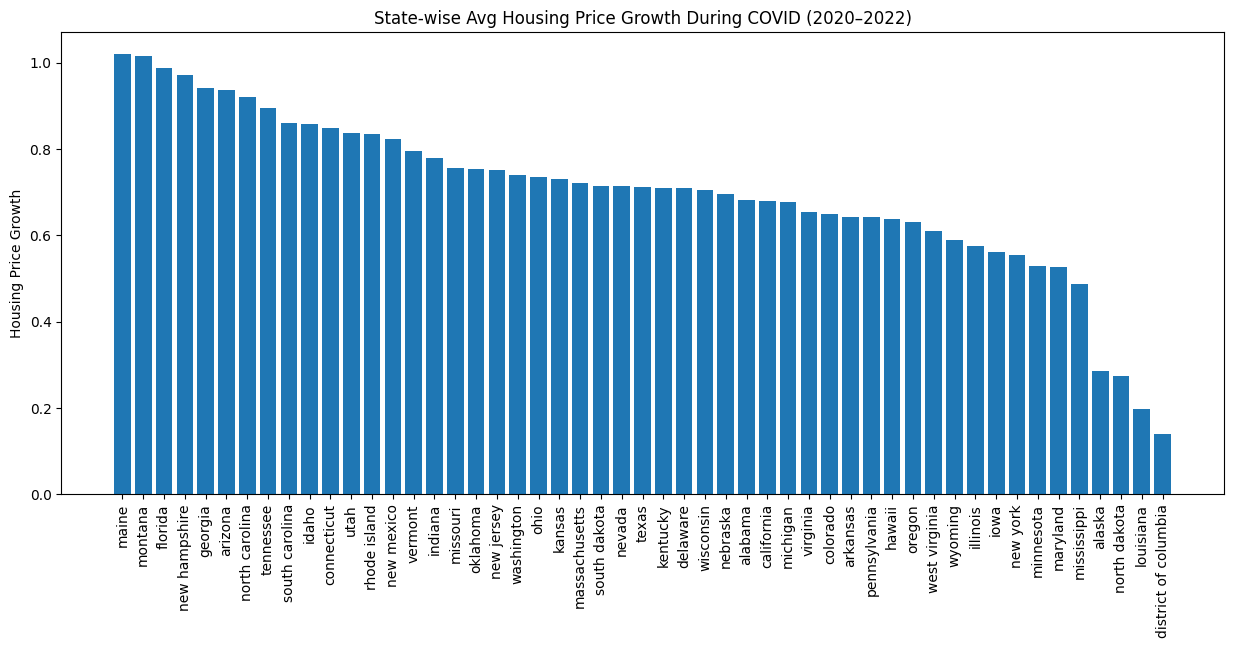

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.bar(state_summary['state'], state_summary['housing_price_growth'])
plt.xticks(rotation=90)
plt.ylabel("Housing Price Growth")
plt.title("State-wise Avg Housing Price Growth During COVID (2020–2022)")
plt.show()


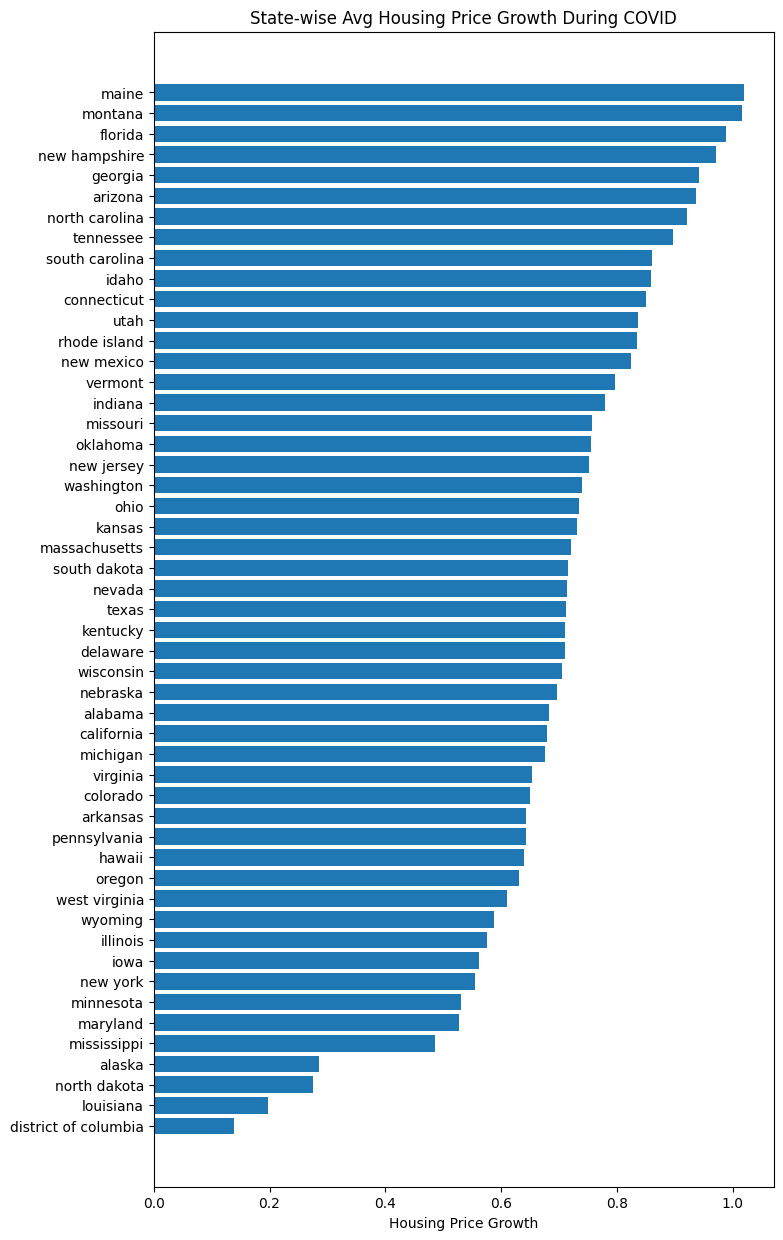

In [12]:
plt.figure(figsize=(8,15))
plt.barh(state_summary['state'], state_summary['housing_price_growth'])
plt.xlabel("Housing Price Growth")
plt.title("State-wise Avg Housing Price Growth During COVID")
plt.gca().invert_yaxis()
plt.show()


In [20]:
print("🔝 Top 10 States Growth")
display(state_summary.head(10))

print("🔻 Bottom 10 States Growth")
display(state_summary.tail(10))


🔝 Top 10 States Growth


,state,housing_price_growth
19,maine,1.019581
26,montana,1.015419
9,florida,0.987496
29,new hampshire,0.970528
10,georgia,0.940714
2,arizona,0.935814
33,north carolina,0.920663
42,tennessee,0.895814
40,south carolina,0.859678
12,idaho,0.858884


🔻 Bottom 10 States Growth


,state,housing_price_growth
13,illinois,0.575550
15,iowa,0.561203
32,new york,0.554609
23,minnesota,0.530059
20,maryland,0.526843
24,mississippi,0.486483
1,alaska,0.285885
34,north dakota,0.274379
18,louisiana,0.196583
8,district of columbia,0.138774


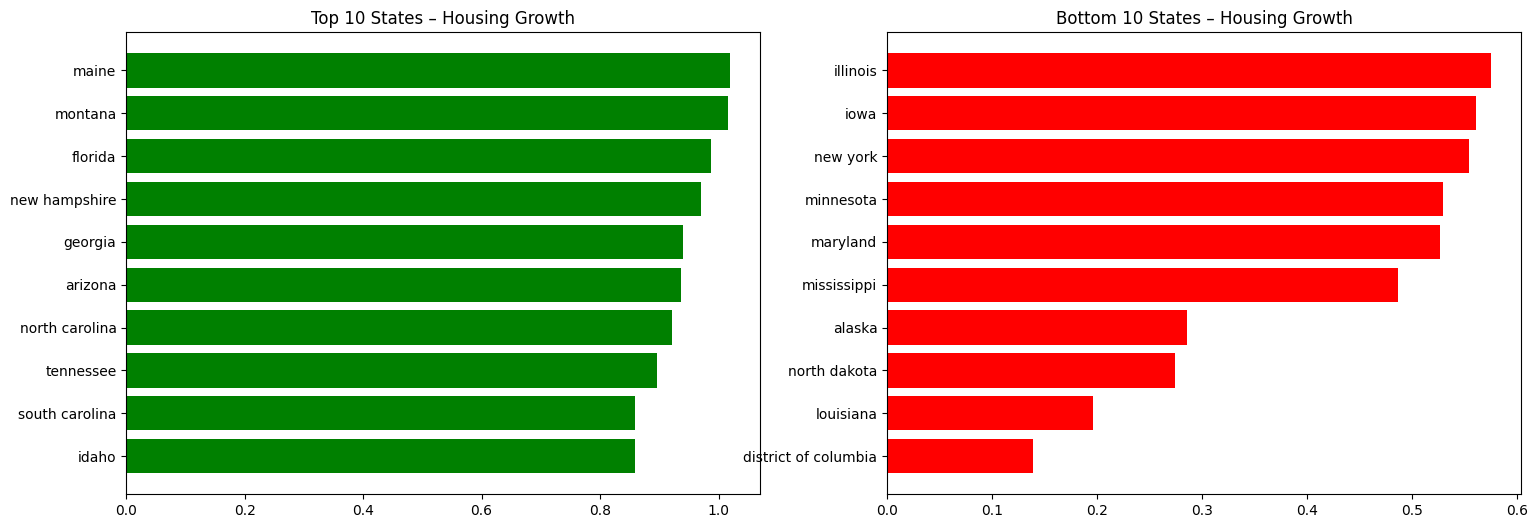

In [24]:
# Step 1: Sort
state_sorted = state_summary.sort_values("housing_price_growth", ascending=False)

# Step 2: Get subsets
top10 = state_sorted.head(10)
bottom10 = state_sorted.tail(10)

# Step 3: Visualize top/bottom
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].barh(top10['state'], top10['housing_price_growth'], color="green")
axes[0].invert_yaxis()
axes[0].set_title("Top 10 States – Housing Growth")

axes[1].barh(bottom10['state'], bottom10['housing_price_growth'], color="red")
axes[1].invert_yaxis()
axes[1].set_title("Bottom 10 States – Housing Growth")

plt.show()


In [28]:
df.columns.tolist()

['state',
 'quarter',
 'housing_price_growth',
 'stringency_index',
 'deaths_per_million',
 'gdp_growth',
 'average_interest_rate',
 'unemployment_rate']

# how the drop in interest rates during covid affect house prices in each state?

In [30]:
state_rate = (
    df.groupby("state")[["housing_price_growth", "average_interest_rate"]]
    .mean()
    .reset_index()
)
state_rate.head()


,state,housing_price_growth,average_interest_rate
0,alabama,0.682569,1.233789
1,alaska,0.285885,0.773047
2,arizona,0.935814,0.683203
3,arkansas,0.642795,1.048828
4,california,0.679299,0.809180


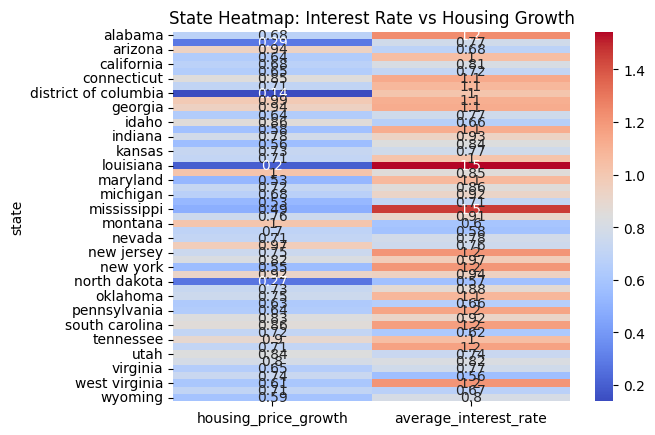

In [38]:
import seaborn as sns
pivot = state_rate.set_index("state")
sns.heatmap(pivot, cmap="coolwarm", annot=True)
plt.title("State Heatmap: Interest Rate vs Housing Growth")
plt.show()


In [40]:
top10 = state_rate.sort_values("housing_price_growth", ascending=False).head(10)
bottom10 = state_rate.sort_values("housing_price_growth", ascending=False).tail(10)

top10, bottom10


(             state  housing_price_growth  average_interest_rate
 19           maine              1.019581               0.853125
 26         montana              1.015419               0.599219
 9          florida              0.987496               1.111133
 29   new hampshire              0.970528               0.764453
 10         georgia              0.940714               1.122461
 2          arizona              0.935814               0.683203
 33  north carolina              0.920663               0.942969
 42       tennessee              0.895814               1.049023
 40  south carolina              0.859678               1.171680
 12           idaho              0.858884               0.662891,
                    state  housing_price_growth  average_interest_rate
 13              illinois              0.575550               1.119727
 15                  iowa              0.561203               0.836523
 32              new york              0.554609               1.200391


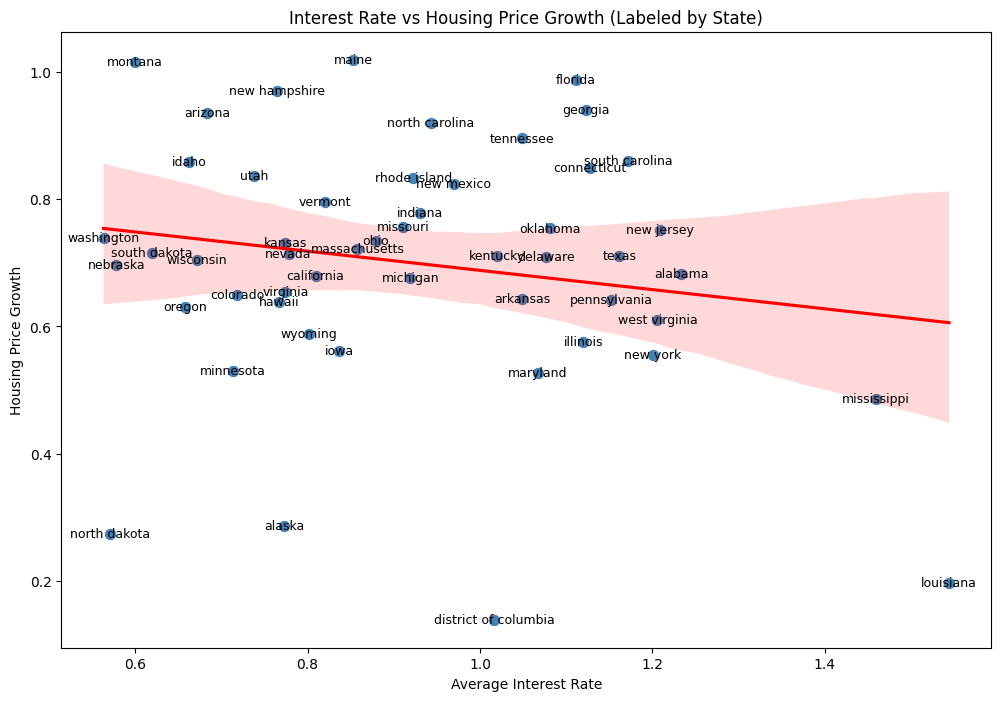

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# base scatter
sns.scatterplot(
    data=state_rate,
    x="average_interest_rate",
    y="housing_price_growth",
    color="steelblue",
    s=80
)

# regression line
sns.regplot(
    data=state_rate,
    x="average_interest_rate",
    y="housing_price_growth",
    scatter=False,
    color='red'
)

# add text labels
for i in range(len(state_rate)):
    plt.text(
        state_rate["average_interest_rate"][i],
        state_rate["housing_price_growth"][i],
        state_rate["state"][i],
        fontsize=9,
        ha='center',
        va='center'
    )

plt.title("Interest Rate vs Housing Price Growth (Labeled by State)")
plt.xlabel("Average Interest Rate")
plt.ylabel("Housing Price Growth")
plt.show()


# how high stringency states leading to more unemployment affected the house prices?

In [46]:
# Compute mean by state
state_stringency = (
    df.groupby("state")[["stringency_index", "housing_price_growth"]]
    .mean()
    .reset_index()
)

# Determine threshold (median)
threshold = state_stringency["stringency_index"].median()
threshold


35.33162081875

In [48]:
state_stringency["stringency_group"] = state_stringency["stringency_index"].apply(
    lambda x: "High Stringency" if x >= threshold else "Low Stringency"
)

state_stringency.head()


,state,stringency_index,housing_price_growth,stringency_group
0,alabama,33.109036,0.682569,Low Stringency
1,alaska,36.387199,0.285885,High Stringency
2,arizona,33.050251,0.935814,Low Stringency
3,arkansas,34.482399,0.642795,Low Stringency
4,california,39.581759,0.679299,High Stringency


In [50]:
comparison = (
    state_stringency
    .groupby("stringency_group")["housing_price_growth"]
    .mean()
    .reset_index()
)

comparison


,stringency_group,housing_price_growth
0,High Stringency,0.690406
1,Low Stringency,0.709935


/var/folders/fh/lxfs52fx3jb5p26rhy8vb9_m0000gn/T/ipykernel_10265/206499313.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/fh/lxfs52fx3jb5p26rhy8vb9_m0000gn/T/ipykernel_10265/206499313.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




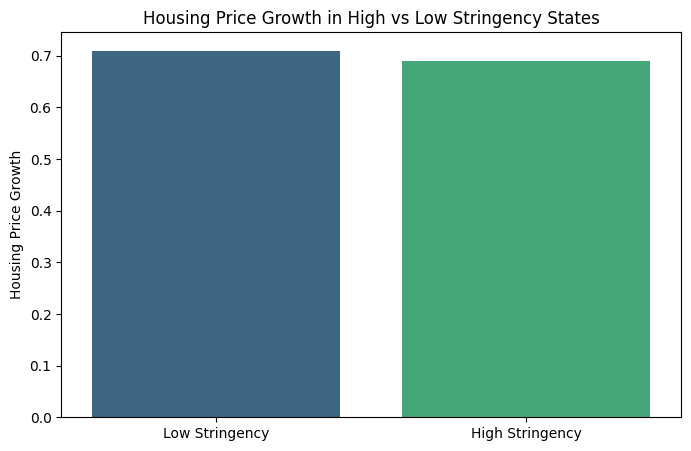

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=state_stringency,
    x="stringency_group",
    y="housing_price_growth",
    palette="viridis",
    ci=None
)

plt.title("Housing Price Growth in High vs Low Stringency States")
plt.xlabel("")
plt.ylabel("Housing Price Growth")
plt.show()


# yearly comparation

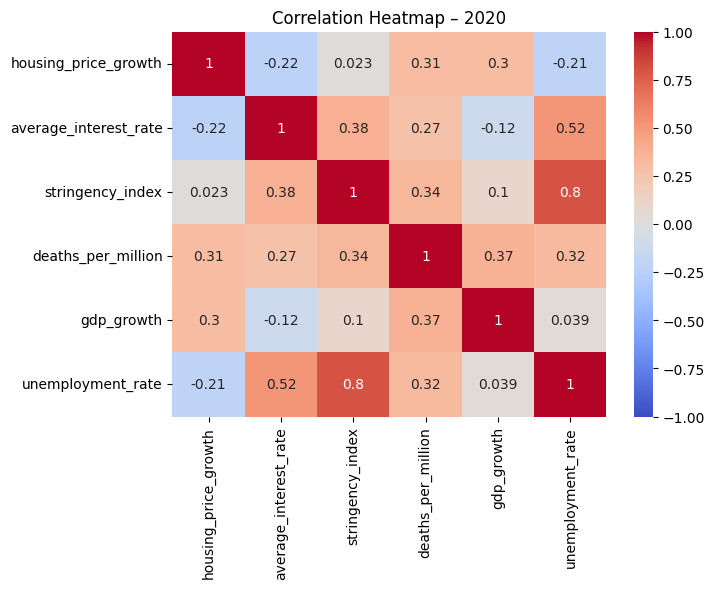

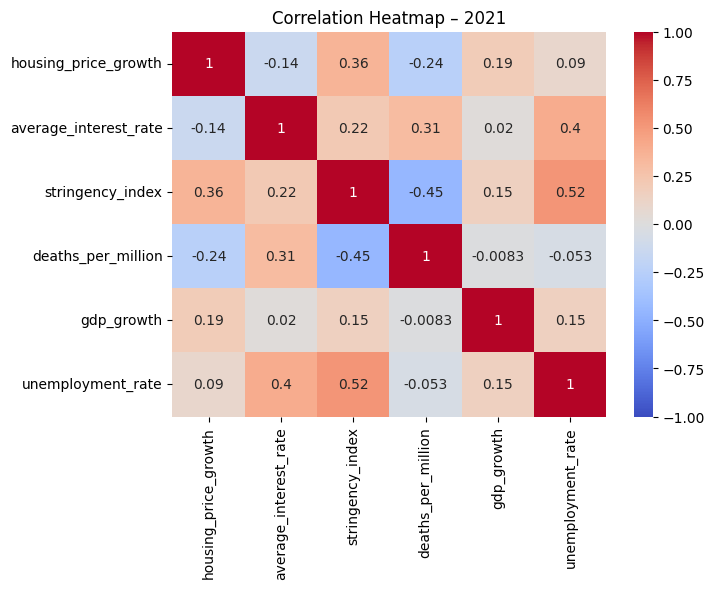

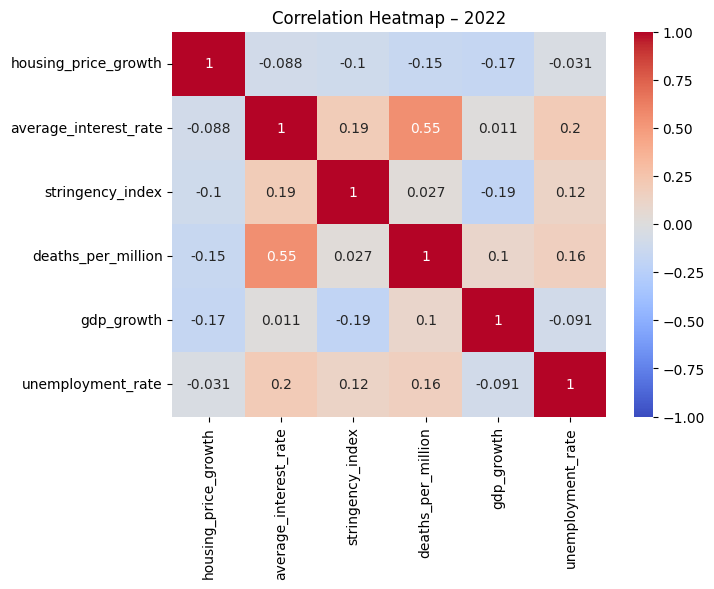

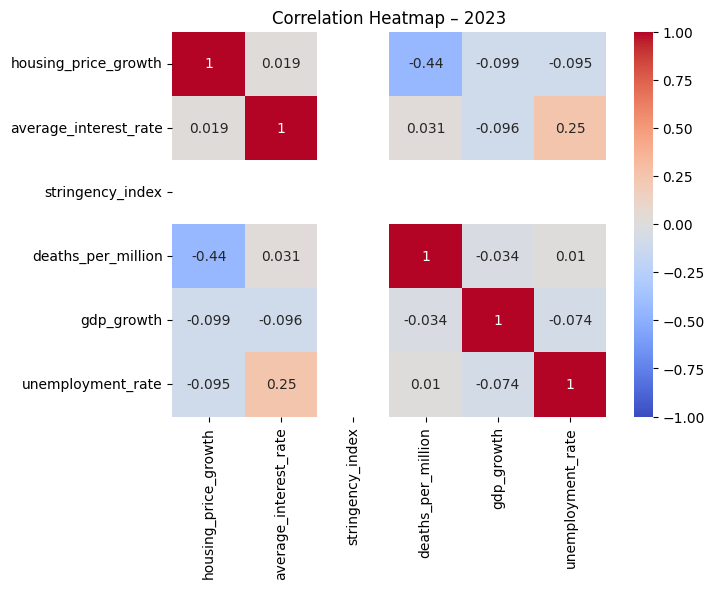

In [70]:
df["year"] = df["quarter"].astype(str).str[:4]

factors = [
    "housing_price_growth",
    "average_interest_rate",
    "stringency_index",
    "deaths_per_million",
    "gdp_growth",
    "unemployment_rate"
]

years = sorted(df["year"].unique())

for y in years:
    sub = df[df["year"] == y][factors]

    plt.figure(figsize=(7,5))
    sns.heatmap(sub.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Correlation Heatmap – {y}")
    plt.show()
